In [1]:
import numpy as np
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

def Normalization(data_matrix):
    #data_matrix = data.to_numpy()
    x_min = np.min(data_matrix)
    x_max = np.max(data_matrix)
    x_norm = (data_matrix-x_min)/(x_max-x_min)

    return x_norm, x_max, x_min



In [2]:
dataset = pd.read_csv('E:/Định Vị - ESP32/Data_test13_9.csv')
data = dataset.iloc[:, :1200]
train_data = np.array(data)
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
train_data = (train_data - min_val) / (max_val - min_val)
train_data.numpy()


array([[0.82051282, 0.82051282, 0.82051282, ..., 0.41025641, 0.38461538,
        0.38461538],
       [0.53846154, 0.61538462, 0.69230769, ..., 0.38461538, 0.43589744,
        0.35897436],
       [0.69230769, 0.30769231, 0.38461538, ..., 0.46153846, 0.28205128,
        0.43589744],
       ...,
       [0.41025641, 0.38461538, 0.38461538, ..., 0.35897436, 0.53846154,
        0.51282051],
       [0.33333333, 0.33333333, 0.46153846, ..., 0.30769231, 0.25641026,
        0.15384615],
       [0.53846154, 0.53846154, 0.41025641, ..., 0.23076923, 0.30769231,
        0.28205128]])

In [3]:

class FingerPrint_Extraction(Model):
  def __init__(self):
      super(FingerPrint_Extraction, self).__init__()
      self.encoder = tf.keras.Sequential([
          layers.Dense(1200, activation = 'tanh'),
          layers.Dense(1000, activation = 'tanh'),
          layers.Dense(800, activation = 'tanh'),
          layers.Dense(600, activation = 'tanh'),
          layers.Dense(400, activation = 'tanh'),
          layers.Dense(200, activation = 'tanh'),
          layers.Dense(12, activation = 'tanh')])
      self.decoder = tf.keras.Sequential([
          layers.Dense(12, activation = 'tanh'),
          layers.Dense(200, activation = 'tanh'),
          layers.Dense(400, activation = 'tanh'),
          layers.Dense(600, activation = 'tanh'),
          layers.Dense(800, activation = 'tanh'),
          layers.Dense(1000, activation = 'tanh'),
          layers.Dense(1200, activation = 'tanh')])
  
  def call(self, x):
      encoded = self.encoder(x)
      decoded = self.decoder(encoded)
      return decoded



  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = FingerPrint_Extraction()
autoencoder = FingerPrint_Extraction()
autoencoder.compile(optimizer = 'adam', loss = 'mae')

In [4]:

df = pd.DataFrame()
for i in range(75):
    train_data_i = train_data[i]
    train_data_i = train_data_i.numpy()
    train_data_i = train_data_i.reshape(1,1200)
    history = autoencoder.fit(train_data_i, train_data_i, 
          epochs=200, 
          batch_size=256,
          shuffle=True)
    encoded_data_i = autoencoder.encoder(train_data_i).numpy()
    decoded_data_i = autoencoder.decoder(encoded_data_i).numpy()
    decoded_df_i = pd.DataFrame(decoded_data_i)
    df = pd.concat([df, decoded_df_i], axis = 0)
    print(i)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.4525
Epoch 2/200
1/1 [==============================] - 0s 43ms/step - loss: 0.3702
Epoch 3/200
1/1 [==============================] - 0s 54ms/step - loss: 0.2344
Epoch 4/200
1/1 [==============================] - 0s 60ms/step - loss: 0.1719
Epoch 5/200
1/1 [==============================] - 0s 66ms/step - loss: 0.1490
Epoch 6/200
1/1 [==============================] - 0s 57ms/step - loss: 0.1365
Epoch 7/200
1/1 [==============================] - 0s 55ms/step - loss: 0.1054
Epoch 8/200
1/1 [==============================] - 0s 64ms/step - loss: 0.1017
Epoch 9/200
1/1 [==============================] - 0s 69ms/step - loss: 0.0884
Epoch 10/200
1/1 [==============================] - 0s 55ms/step - loss: 0.0671
Epoch 11/200
1/1 [==============================] - 0s 63ms/step - loss: 0.0673
Epoch 12/200
1/1 [==============================] - 0s 58ms/step - loss: 0.0706
Epoch 13/200
1/1 [==============================] -

KeyboardInterrupt: 

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,0.825060,0.832331,0.829978,0.726295,0.752083,0.744125,0.761346,0.740693,0.735186,0.851384,...,0.507409,0.521967,0.354559,0.365410,0.410134,0.525597,0.417618,0.439010,0.385610,0.404374
0,0.536081,0.616004,0.694177,0.692506,0.695292,0.696007,0.598560,0.615638,0.607858,0.618213,...,0.435515,0.443095,0.444665,0.229067,0.272351,0.292173,0.286755,0.392300,0.426178,0.374836
0,0.702561,0.307564,0.391144,0.373543,0.382158,0.398935,0.320835,0.366495,0.370281,0.367314,...,0.381094,0.358845,0.326421,0.420595,0.409717,0.341336,0.427875,0.465936,0.285007,0.451086
0,0.513012,0.392919,0.440751,0.391351,0.584729,0.491776,0.612974,0.508595,0.508206,0.521205,...,0.460437,0.592206,0.584250,0.589841,0.605303,0.588124,0.588042,0.423389,0.431956,0.446468
0,0.619400,0.541662,0.585033,0.570195,0.430311,0.407005,0.440740,0.279941,0.171967,0.258118,...,0.483250,0.457604,0.457876,0.454215,0.460949,0.459988,0.455405,0.453545,0.483441,0.433605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000
0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000
0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000
0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000


In [ ]:
df.to_csv('E:/Định Vị - ESP32/fingerprint_test_kalman2.csv')

In [ ]:
encoded_data1 = autoencoder.encoder(train_data1).numpy()
decoded_data1 = autoencoder.decoder(encoded_data1).numpy()
decoded_data1[0]


array([0.42684808, 0.52412444, 0.48928922, ..., 0.57525843, 0.5483545 ,
       0.4727459 ], dtype=float32)

In [ ]:
encoded_data2 = autoencoder.encoder(train_data2).numpy()
decoded_data2 = autoencoder.decoder(encoded_data2).numpy()
decoded_data2[0]


array([0.42684802, 0.52412504, 0.48929012, ..., 0.575259  , 0.5483548 ,
       0.47274688], dtype=float32)

In [ ]:
data = pd.read_csv('E:/Định Vị - ESP32/_data28_8.csv')
data = data.values
finger = pd.read_csv('E:/Định Vị - ESP32/fingerprint_train.csv')
finger = finger.iloc[: , : 1200]
finger = finger.values
min_val = np.min(data)
max_val = np.max(data)
data = (data - min_val) / (max_val - min_val)


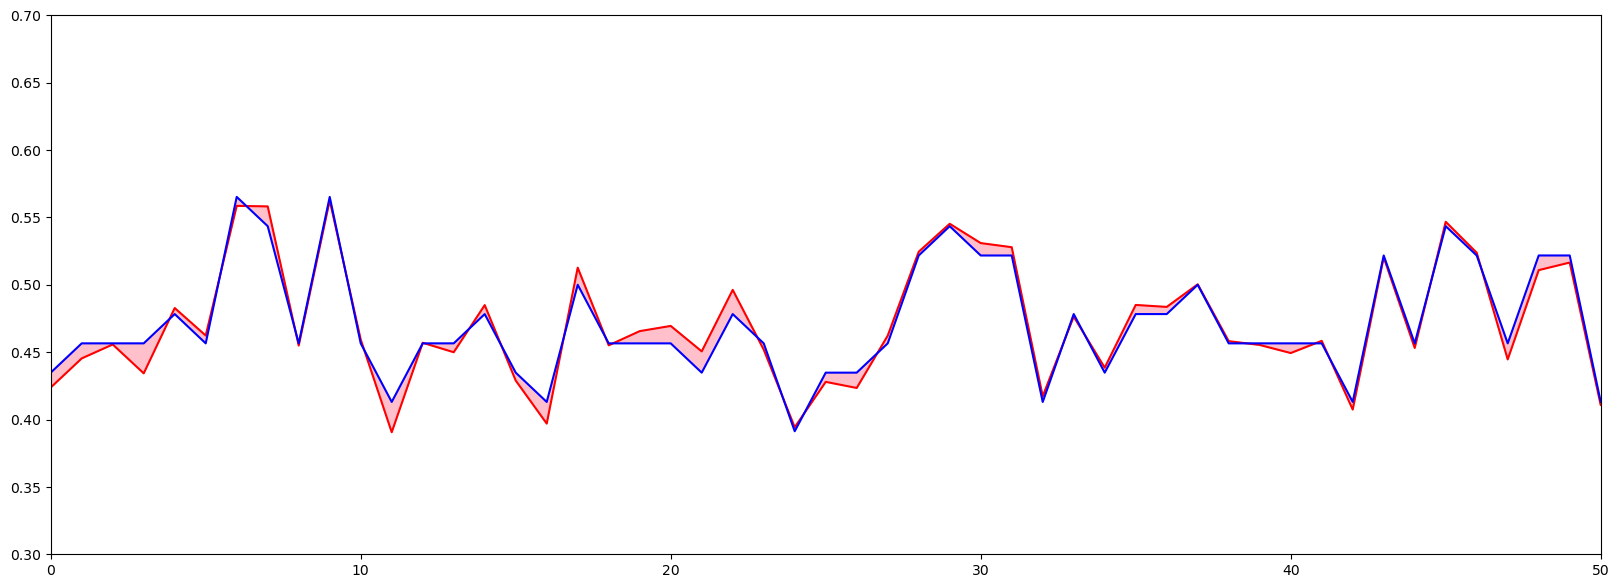

In [ ]:
plt.figure(figsize=(20,7))
plt.xlim(0,50)
plt.ylim(0.3,0.7)
plt.plot(finger[1],'r')
plt.plot(data[1],'b')
plt.fill_between(np.arange(1200),data[1] , finger[1], color='pink')

In [ ]:
finger_doc = pd.read_csv('E:/Định Vị - ESP32/Finger_doc.csv')
test_doc = pd.read_csv('E:/Định Vị - ESP32/norm_new.csv')
finger_doc = finger_doc.to_numpy()
test_doc = test_doc.to_numpy()

In [ ]:
import math

def minkowski_distance(point_a, point_b, p):
    distance_sum = 0
    for i in range(len(point_a)):
        distance_sum += abs(point_a[i] - point_b[i]) ** p
    
    distance = distance_sum ** (1 / p)
    return distance

def slide_window(arr1, arr2):
    result = []
    for i in range(0,180,30):
        segment = arr1[i:i+30]
        abs_diff = [abs(x-y)**6 for x, y in zip(segment, arr2)]
        result.append(abs_diff)

    return result

def sum_array(arr):
    arr = np.array(arr)
    arr = arr.reshape(-1, 1)
    sum = 0
    for i in range(len(arr)):
        sum = sum + arr[i]
    return sum**(1/6)

In [ ]:
rows = 75
cols = 75
# Tạo mảng 2 chiều 75x75 với tất cả các phần tử là None
total = [[None for _ in range(cols)] for _ in range(rows)]
np.shape(total)

(75, 75)

In [ ]:

for i in range(75):
    for j in range(75):
        result1 = slide_window(finger_doc[i][0:200],test_doc[j][0:30])
        result2 = slide_window(finger_doc[i][200:400],test_doc[j][30:60])
        result3 = slide_window(finger_doc[i][400:600],test_doc[j][60:90])
        result4 = slide_window(finger_doc[i][600:800],test_doc[j][90:120])
        result5 = slide_window(finger_doc[i][800:1000],test_doc[j][120:150])
        result6 = slide_window(finger_doc[i][1000:1200],test_doc[j][150:180])

        sum1 = sum_array(result1)
        sum2 = sum_array(result2)
        sum3 = sum_array(result3)
        sum4 = sum_array(result4)
        sum5 = sum_array(result5)
        sum6 = sum_array(result6)

        sum = sum1+sum2+sum3+sum4+sum5+sum6
        total[i][j] = sum
        sum = 0

np.shape(total)
    

(75, 75, 1)

In [ ]:

total=np.array(total)
total = total.reshape(75,75)
total = pd.DataFrame(total)
total.to_csv('E:/Định Vị - ESP32/Test6_new.csv')

In [ ]:
def find_smallest_elements_with_indices(arr, k):
    # Tạo một danh sách các cặp (giá trị, chỉ số) từ mảng
    value_index_pairs = [(value, index) for index, value in enumerate(arr)]
    
    # Sắp xếp danh sách các cặp theo giá trị
    value_index_pairs.sort()
    
    # Lấy k phần tử đầu tiên
    smallest_value_indices = value_index_pairs[:k]
    
    # Sắp xếp lại theo thứ tự chỉ số ban đầu
    smallest_value_indices.sort(key=lambda x: x[1])
    
    return smallest_value_indices

ketqua = pd.read_csv('E:/Định Vị - ESP32/Test7_new.csv')
label = pd.read_csv('E:/Định Vị - ESP32/Labels.csv')

kq = np.array(ketqua)

Delta = []

for k in range(75):
    kq_k = kq[k]

    result = find_smallest_elements_with_indices(kq_k, 3)

    for i in range(75):
        if k == label['index'][i]:
            X = label['X'][i]
            Y = label['Y'][i]
            #print(f"Tọa độ đúng: ({X} , {Y})")
    arrX = []
    arrY = []
    for value, index in result:
        for i in range(75):
            if index == label['index'][i]:
                _X = label['X'][i]
                arrX.append(_X)
                _Y = label['Y'][i]
                arrY.append(_Y)
                #print(f"Tọa độ dự đoán: ({_X} , {_Y})")
    avgX = np.mean(arrX)
    avgY = np.mean(arrY)

    delta = np.sqrt((X-avgX)**2+(Y-avgY)**2)
    Delta.append(delta)
    #print(f"Sai số: {delta}")

Delta.sort()
print(Delta[:20])
print(f"Sai số trung bình: {np.mean(Delta[:20])}")




[0.33333333333333304, 0.33333333333333304, 0.33333333333333326, 0.3333333333333335, 0.47140452079103157, 0.6666666666666665, 0.6666666666666667, 0.666666666666667, 0.7453559924999299, 0.7453559924999302, 0.7453559924999302, 0.9428090415820634, 0.9428090415820635, 0.9428090415820638, 0.9428090415820638, 1.0540925533894596, 1.118033988749895, 1.2018504251546633, 1.333333333333333, 1.374368541872553]
Sai số trung bình: 0.7946860420226157


In [ ]:
Delta

[0.5555555555555558,
 0.5665577237325313,
 0.625,
 0.8461970117626563,
 0.8678055195451839,
 1.0061539042374907,
 1.1111111111111107,
 1.1811273125260724,
 1.4487116456005888,
 1.6814162167135065,
 1.7356110390903672,
 1.7568209223157665,
 1.8324913891634047,
 1.885618083164127,
 1.8921540406584894,
 2.0875882475617704,
 2.1213203435596424,
 2.2054925823643563,
 2.21387320501903,
 2.222222222222222,
 2.224998266055643,
 2.2498285257018424,
 2.2980970388562794,
 2.354402233379677,
 2.3934065809486684,
 2.4368569110512563,
 2.4444444444444446,
 2.496911672693803,
 2.536158269002962,
 2.5579698740491863,
 2.6010444246043614,
 2.671292284482513,
 2.7442420078285483,
 2.752839443193155,
 2.7777777777777777,
 2.8327886186626583,
 2.8974232912011773,
 3.0020569080236212,
 3.0020569080236212,
 3.0651364942519383,
 3.0872097754332897,
 3.094854600784987,
 3.2451293036689406,
 3.2829526005987018,
 3.290465087769077,
 3.3035708327374453,
 3.384788047050625,
 3.3920750049941666,
 3.488959659579462

In [ ]:
df = pd.read_csv("E:/Định Vị - ESP32/test0.csv")

dfx = df['1'][0:200].to_list()+df['2'][0:200].to_list()
len(dfx)

400

In [ ]:
new_df = []
for i in range(0,15000,200):
    df_i = df['1'][i:i+200].to_list()+df['2'][i:i+200].to_list()+df['3'][i:i+200].to_list()+df['4'][i:i+200].to_list()+df['5'][i:i+200].to_list()+df['6'][i:i+200].to_list()
    new_df.append(df_i)
np.shape(new_df)
new_df = np.array(new_df)
new_df = pd.DataFrame(new_df)
new_df.to_csv('E:/Định Vị - ESP32/new_test.csv')

In [ ]:
list1 = [1, 2, 3]
list2 = [4, 5, 6]

result_list = list1 + list2

print(result_list)



[1, 2, 3, 4, 5, 6]


In [ ]:
data28_8 = pd.read_csv('E:/Định Vị - ESP32/_data28_8.csv')
data = data28_8.values
data

array([[-67, -68, -67, ..., -82, -82, -85],
       [-83, -82, -82, ..., -86, -85, -85],
       [-82, -76, -78, ..., -85, -84, -87],
       ...,
       [-83, -79, -79, ..., -87, -86, -87],
       [-89, -89, -91, ..., -85, -80, -86],
       [-81, -81, -81, ..., -83, -83, -82]], dtype=int64)

In [ ]:
new = []
for i in range(75):
    selected_elements = []

    # Các khoảng đã chỉ định
    ranges = [(0, 200), (200, 400), (400, 600), (600, 800), (800, 1000), (1000, 1200)]

    # Lặp qua từng khoảng và lấy ngẫu nhiên 30 phần tử
    for start, end in ranges:
        random_indices = np.random.choice(np.arange(start, end), size=30, replace=False)
        selected_elements.extend(data[i][random_indices])
    new.append(selected_elements)

In [ ]:
new = pd.DataFrame(new)
new.to_csv('E:/Định Vị - ESP32/new.csv')

In [229]:
finger_doc = pd.read_csv('E:/Định Vị - ESP32/fingerprint_train.csv')
test_doc = pd.read_csv('E:/Định Vị - ESP32/fingerprint_test.csv')
finger_doc = finger_doc.to_numpy()
test_doc = test_doc.to_numpy()

def minkowski_distance(point_a, point_b, p):
    distance_sum = 0
    for i in range(len(point_a)):
        distance_sum += abs(point_a[i] - point_b[i]) ** p
    
    distance = distance_sum ** (1 / p)
    return distance

def sum_array(arr):
    arr = np.array(arr)
    arr = arr.reshape(-1, 1)
    sum = 0
    for i in range(len(arr)):
        sum = sum + arr[i]
    return sum

rows = 75
cols = 75
# Tạo mảng 2 chiều 75x75 với tất cả các phần tử là None
total = [[None for _ in range(cols)] for _ in range(rows)]

for i in range(75):
    for j in range(75):
        distance = minkowski_distance(test_doc[j],finger_doc[i],12)
        sum = np.sum(distance)
        total[j][i]=sum
        
#total=np.array(total)
#total = total.reshape(75,75)
#total = pd.DataFrame(total)
#total.to_csv('E:/Định Vị - ESP32/Test_x1.csv')      


def find_smallest_elements_with_indices(arr, k):
    # Tạo một danh sách các cặp (giá trị, chỉ số) từ mảng
    value_index_pairs = [(value, index) for index, value in enumerate(arr)]
    
    # Sắp xếp danh sách các cặp theo giá trị
    value_index_pairs.sort()
    
    # Lấy k phần tử đầu tiên
    smallest_value_indices = value_index_pairs[:k]
    
    # Sắp xếp lại theo thứ tự chỉ số ban đầu
    #smallest_value_indices.sort(key=lambda x: x[1])
    
    return smallest_value_indices

#ketqua = pd.read_csv('E:/Định Vị - ESP32/Test_x1.csv')
label = pd.read_csv('E:/Định Vị - ESP32/Labels.csv')
#ketqua = ketqua.iloc[:75,1:76]
kq = total
#kq = np.array(ketqua)

Delta = []

for k in range(75):
    kq_k = kq[k]

    result = find_smallest_elements_with_indices(kq_k,4)

    for i in range(75):
        if k == label['index'][i]:
            X = label['X'][i]
            Y = label['Y'][i]
            #print(f"Tọa độ đúng: ({X} , {Y})")
    arrX = []
    arrY = []
    for value, index in result:
        for i in range(75):
            if index == label['index'][i]:
                _X = label['X'][i]
                arrX.append(_X)
                _Y = label['Y'][i]
                arrY.append(_Y)
                #print(f"Tọa độ dự đoán: ({_X} , {_Y})")
    avgX = np.mean(arrX)
    avgY = np.mean(arrY)

    delta = np.sqrt((X-avgX)**2+(Y-avgY)**2)
    Delta.append(delta)
    #print(f"Sai số: {delta}")

Delta = find_smallest_elements_with_indices(Delta,75)
Delta = Delta[40:75]
D = pd.DataFrame(Delta)
D




,0,1
0,3.051639,57
1,3.092329,20
2,3.132491,68
3,3.162278,43
4,3.162278,60
5,3.181981,35
6,3.354102,32
7,3.354102,44
8,3.354102,45
9,3.482097,40


In [31]:
finger_doc = pd.read_csv('E:/Định Vị - ESP32/fingerprint_train.csv')
test_doc = pd.read_csv('E:/Định Vị - ESP32/fingerprint_test - Copy.csv')

finger_doc = finger_doc.to_numpy()
test_doc = test_doc.iloc[:12,1:1201]
test_doc = test_doc.to_numpy()

def minkowski_distance(point_a, point_b, p):
    distance_sum = 0
    for i in range(len(point_a)):
        distance_sum += abs(point_a[i] - point_b[i]) ** p
    
    distance = distance_sum ** (1 / p)
    return distance

def sum_array(arr):
    arr = np.array(arr)
    arr = arr.reshape(-1, 1)
    sum = 0
    for i in range(len(arr)):
        sum = sum + arr[i]
    return sum

rows = 12
cols = 75
# Tạo mảng 2 chiều 75x75 với tất cả các phần tử là None
total = [[None for _ in range(cols)] for _ in range(rows)]

for i in range(75):
    for j in range(12):
        distance = minkowski_distance(test_doc[j],finger_doc[i],12)
        sum = np.sum(distance)
        total[j][i]=sum
        
#total = np.array(total)
#total = total.reshape(20,75)
#total = pd.DataFrame(total)
#total.to_csv('E:/Định Vị - ESP32/Test_x1.csv')  
    

def find_smallest_elements_with_indices(arr, k):
    # Tạo một danh sách các cặp (giá trị, chỉ số) từ mảng
    value_index_pairs = [(value, index) for index, value in enumerate(arr)]
    
    # Sắp xếp danh sách các cặp theo giá trị
    value_index_pairs.sort()
    
    # Lấy k phần tử đầu tiên
    smallest_value_indices = value_index_pairs[:k]
    
    # Sắp xếp lại theo thứ tự chỉ số ban đầu
    #smallest_value_indices.sort(key=lambda x: x[1])
    
    return smallest_value_indices

#ketqua = total
label_train = pd.read_csv('E:/Định Vị - ESP32/Labels.csv')
label_test = pd.read_csv('E:/Định Vị - ESP32/Labels_test.csv')
#kq = ketqua.iloc[:20,1:76]
#kq = np.array(ketqua)
kq = total


Delta = []
for i in range(12):
    for j in range(75):
        if label_test['index'][i]  == label_train['index'][j]:
            X = label_train['X'][j]
            Y = label_train['Y'][j]
    
    result = find_smallest_elements_with_indices(kq[i],6)
    arrX = []
    arrY = []

    for value, index in result:
        for k in range(75):
            if index == label_train['index'][k]:
                _X = label_train['X'][k]
                arrX.append(_X)
                _Y = label_train['Y'][k]
                arrY.append(_Y)
    avgX = np.mean(arrX)
    avgY = np.mean(arrY)

    delta = np.sqrt((X-avgX)**2+(Y-avgY)**2)
    Delta.append(delta)

Delta = find_smallest_elements_with_indices(Delta,12) 

"""sum = 0
for i in range(12):
    sum = sum + Delta[i][0]
print(sum/12)"""

D = []
for i in range(12):
    D.append(Delta[i][0])
D = pd.DataFrame(D)
D


,0
0,0.527046
1,1.178511
2,2.192158
3,2.266912
4,2.603417
5,2.773886
6,3.041381
7,3.064129
8,3.236081
9,3.236081


In [ ]:
result = find_smallest_elements_with_indices(kq[10],5)
result

[(0.9667722442792722, 12),
 (1.20522555365755, 17),
 (1.3744964494594027, 21),
 (1.129451748164847, 32),
 (0.7943799049111476, 39)]

In [ ]:
label_train

,index,X,Y
0,0,1,0
1,1,2,0
2,2,3,0
3,3,4,0
4,4,5,0
...,...,...,...
70,70,3,8
71,71,4,8
72,72,5,8
73,73,6,8


In [181]:

train = pd.read_csv('E:/Định Vị - ESP32/fingerprint_train.csv')
#test = pd.read_csv('E:/Định Vị - ESP32/fingerprint_test_CAE_Kalman2 - Copy.csv')
test = pd.read_csv('E:/Định Vị - ESP32/AE_test_13_9.csv')
label = pd.read_csv('E:/Định Vị - ESP32/Labels.csv')
#test = test.iloc[:20,1:1201]
train = train.to_numpy()
test  = test.to_numpy()

def normalized_cross_correlation(x, y):
    numerator = np.sum(x * y)
    denominator = np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2))
    return numerator / denominator
    

def find_max_elements_with_indices(arr, k):
    # Tạo một danh sách các cặp (giá trị, chỉ số) từ mảng
    value_index_pairs = [(value, index) for index, value in enumerate(arr)]
    
    # Sắp xếp danh sách các cặp theo giá trị
    value_index_pairs.sort(reverse=True)
    
    # Lấy k phần tử đầu tiên
    max_value_indices = value_index_pairs[:k]
    
    # Sắp xếp lại theo thứ tự chỉ số ban đầu
    #max_value_indices.sort(key=lambda x: x[1])
    
    return max_value_indices

A = []
for i in range(75):
    corr = normalized_cross_correlation(test[2],train[i])
    A.append(corr)
B = find_max_elements_with_indices(A,10)
B



[(0.9642922492129179, 46),
 (0.9628969509147371, 69),
 (0.9620485990730706, 67),
 (0.9578527493247244, 62),
 (0.9555598237151746, 43),
 (0.9545131318437955, 38),
 (0.9538614970859429, 41),
 (0.9538035962991402, 30),
 (0.9530247922952266, 27),
 (0.952422749838457, 71)]

In [ ]:
import numpy as np

# Tạo hai vector x[n] và y[n] (ví dụ)
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 5, 3, 4, 5])

# Tính độ dài của hai vector
N = len(x)

# Khởi tạo mảng để lưu tương quan chéo
cross_correlation = np.zeros(N)

# Tính tương quan chéo
for k in range(N):
    cross_correlation[k] = np.sum(x * np.roll(y, k))

# In kết quả
print("Tương quan chéo giữa x và y:")
print(cross_correlation)
np.mean(cross_correlation)

Tương quan chéo giữa x và y:
[61. 54. 52. 55. 48.]


54.0